In [1]:
import re
import nltk  # TEXT pre-processing
import pandas as pd
import numpy as np
from nltk import download, wordnet

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
download('punkt')  # punctuaction
download('stopwords')  
download("wordnet")
#from nltk.corpus import stopwords
import gensim    # this speeds up the pre-processing
from gensim.parsing.preprocessing import remove_stopwords    # use stop words form this libirary gives lighting fast vectorization and stop word removal

lemma = wordnet.WordNetLemmatizer()     # the lammatizer (doesn't change spelling)

# For stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()           # will change spelling                    

from tqdm import tqdm

#import NLP processing packages
from sklearn.feature_extraction.text import (CountVectorizer, TfidfTransformer, TfidfVectorizer)

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score as AC, confusion_matrix as CM


# Import the necesssary libraries

import warnings

warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import (CountVectorizer, TfidfTransformer, TfidfVectorizer)
from sklearn.cluster import (KMeans, AffinityPropagation, AgglomerativeClustering)
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import (PCA, TruncatedSVD)
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.metrics import (silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score)
from sklearn.model_selection import train_test_split

!pip install Levenshtein
!pip install strsimpy
from Levenshtein import distance
from strsimpy.normalized_levenshtein import NormalizedLevenshtein

import difflib
import string

from nltk.tokenize.treebank import TreebankWordDetokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
!pip install gensim

In [3]:
from gensim.models import Word2Vec, KeyedVectors

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_excel(io = 'drive/MyDrive/Colab Notebooks/apziva/potential-talents.xlsx')

In [6]:
data

,id,job_title,location,connection,fit
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85.0,NaN
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44.0,NaN
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
...,...,...,...,...,...
99,100.0,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103.0,NaN
100,101.0,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN
101,102.0,Business Intelligence and Analytics at Travelers,Greater New York City Area,49.0,NaN
102,103.0,Always set them up for Success,Greater Los Angeles Area,500+,NaN


In [7]:
data.shape

(104, 5)

In [8]:
# Count the Null Values

for col in data.columns:
    print(col)
    print(data[col].isna().sum())

id
0
job_title
0
location
0
connection
0
fit
104


In [9]:
# Count the values for job_title

data['job_title'].value_counts(ascending = False)

2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional                 7
Aspiring Human Resources Professional                                                                                    7
Student at Humber College and Aspiring Human Resources Generalist                                                        7
People Development Coordinator at Ryan                                                                                   6
Native English Teacher at EPIK (English Program in Korea)                                                                5
Aspiring Human Resources Specialist                                                                                      5
HR Senior Specialist                                                                                                     5
Student at Chapman University                                                                                            4
SVP, CHRO, Marke

# Cleaned the data using tableau(change Kanada to Canada, Combined Huston, Texas, and Chicago, Illiois, greater Atlanta, turkey, USA)

# Got rid of all the "greater area"

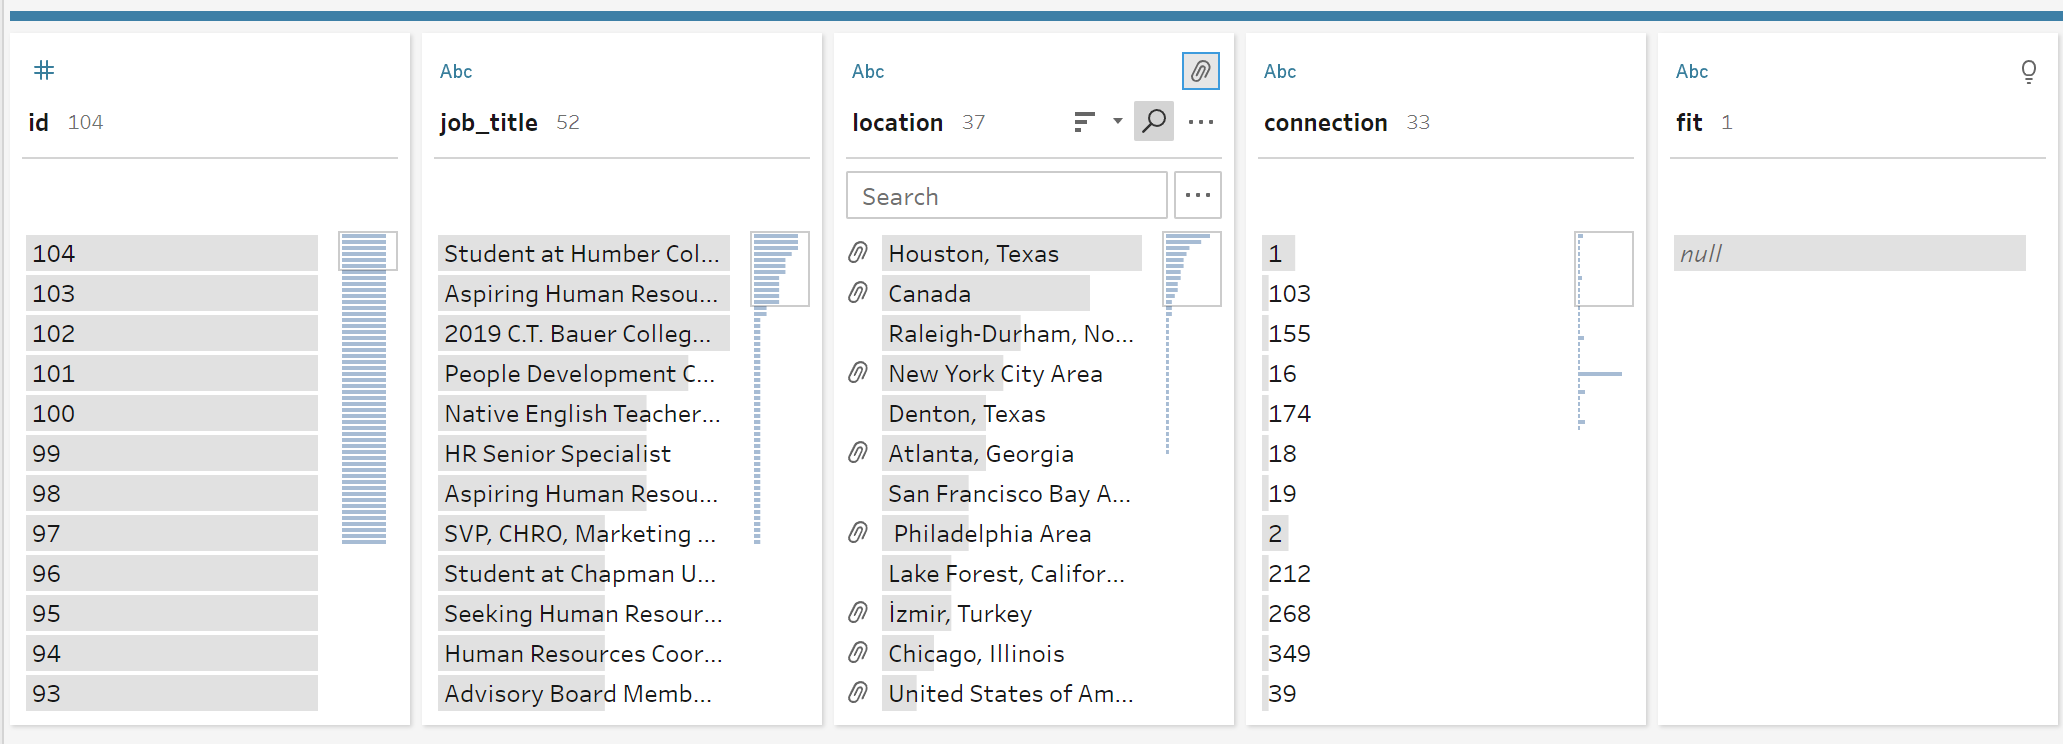


In [10]:
data = pd.read_csv('drive/MyDrive/Colab Notebooks/apziva/potential-talents_cleaned.csv')
data

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Canada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Turkey",500+,NaN
...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN
101,102,Business Intelligence and Analytics at Travelers,New York City Area,49,NaN
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN


In [11]:
data.job_title

0      2019 C.T. Bauer College of Business Graduate (...
1      Native English Teacher at EPIK (English Progra...
2                  Aspiring Human Resources Professional
3                 People Development Coordinator at Ryan
4        Advisory Board Member at Celal Bayar University
                             ...                        
99     Aspiring Human Resources Manager | Graduating ...
100                Human Resources Generalist at Loparex
101     Business Intelligence and Analytics at Travelers
102                       Always set them up for Success
103     Director Of Administration at Excellence Logging
Name: job_title, Length: 104, dtype: object

# feature engineering/extraction and text pre-processing



In [12]:
# make a pipeline for pre-processing


# here we do our text pre-processing
def text_preprocess(data,column):
    from tqdm import tqdm
    # here wines_subset is supposed to be a Pandas dataframe
    from nltk import download, wordnet
    lemma = wordnet.WordNetLemmatizer() 
    stemmer = PorterStemmer()

    documents = []

    for i in tqdm(range(0,len(data))):
        #here we discard the punctuation and the special characters
        words = re.sub('[^a-zA-Z0-9 ]','',data[column][i])
        # here we change all letter to lower case
        words = words.lower()
        # here we tokenize the sentences - each sentence is then an array (list) of words
        words = words.split()
        # here we loop through the different words from the sentences and throw away the "stopwords"
        words = [word for word in words if not word in set(stopwords.words('english'))]  # this filter out stopwords
        
        # here we loop through the different words and we stem them
       #words = [stemmer.stem(word) for word in words]

        # if we want to use lemmatizer instead
        words = [lemma.lemmatize(word) for word in words]


        words = " ".join(words)
        documents.append(words)
    return documents

In [13]:
# remove stopwords, puntuations,etc.

data['job_title'] = text_preprocess(data,'job_title')

100%|██████████| 104/104 [00:01<00:00, 64.46it/s]


In [14]:
data['location'] = text_preprocess(data,'location')

100%|██████████| 104/104 [00:00<00:00, 3071.67it/s]


In [15]:
data

,id,job_title,location,connection,fit
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN
1,2,native english teacher epik english program korea,canada,500+,NaN
2,3,aspiring human resource professional,raleighdurham north carolina area,44,NaN
3,4,people development coordinator ryan,denton texas,500+,NaN
4,5,advisory board member celal bayar university,zmir turkey,500+,NaN
...,...,...,...,...,...
99,100,aspiring human resource manager graduating may...,cape girardeau missouri,103,NaN
100,101,human resource generalist loparex,raleighdurham north carolina area,500+,NaN
101,102,business intelligence analytics traveler,new york city area,49,NaN
102,103,always set success,greater los angeles area,500+,NaN


In [16]:
data['location'] = data['location'].replace(to_replace = ['area', 'greater'], value = '', regex = True)
data['location'] = data['location'].replace(to_replace = 'philadelphia',value = 'philadelhia pensilvania')\
                    .replace(to_replace = 'new york city', value = 'new york new york')

In [17]:
data

,id,job_title,location,connection,fit
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN
1,2,native english teacher epik english program korea,canada,500+,NaN
2,3,aspiring human resource professional,raleighdurham north carolina,44,NaN
3,4,people development coordinator ryan,denton texas,500+,NaN
4,5,advisory board member celal bayar university,zmir turkey,500+,NaN
...,...,...,...,...,...
99,100,aspiring human resource manager graduating may...,cape girardeau missouri,103,NaN
100,101,human resource generalist loparex,raleighdurham north carolina,500+,NaN
101,102,business intelligence analytics traveler,new york city,49,NaN
102,103,always set success,los angeles,500+,NaN


In [18]:
data['location'].value_counts()

houston texas                    15
canada                           12
raleighdurham north carolina      8
new york city                     7
denton texas                      6
atlanta georgia                   6
san francisco bay                 5
philadelphia                      5
zmir turkey                       4
lake forest california            4
chicago illinois                  3
united state america              2
 los angeles                      2
austin texas                      2
la vega nevada                    1
kokomo indiana                    1
lafayette indiana                 1
bridgewater massachusetts         1
long beach california             1
highland california               1
torrance california               1
milpitas california               1
baltimore maryland                1
gaithersburg maryland             1
cape girardeau missouri           1
new york new york                 1
chattanooga tennessee             1
myrtle beach south carolina 

In [19]:
data['job_title'].value_counts()

2019 ct bauer college business graduate magna cum laude aspiring human resource professional               7
aspiring human resource professional                                                                       7
student humber college aspiring human resource generalist                                                  7
people development coordinator ryan                                                                        6
native english teacher epik english program korea                                                          5
aspiring human resource specialist                                                                         5
hr senior specialist                                                                                       5
student chapman university                                                                                 4
svp chro marketing communication csr officer engie houston woodland energy gphr sphr                       4
human resource coor

In [20]:

# Change the number 500+ for just 500

data['connection'] = data['connection'].replace(to_replace = '500', value = 500, regex = True)
# Change the connection column to strings

data['connection'] = data['connection'].astype(str)

# Have all the strings in one column

data['combined'] = data['job_title'].add(' ').add(data['location'])

In [21]:
data['combined'].value_counts()

2019 ct bauer college business graduate magna cum laude aspiring human resource professional houston texas                         7
student humber college aspiring human resource generalist canada                                                                   7
aspiring human resource professional raleighdurham north carolina                                                                  6
people development coordinator ryan denton texas                                                                                   6
native english teacher epik english program korea canada                                                                           5
aspiring human resource specialist new york city                                                                                   5
hr senior specialist san francisco bay                                                                                             5
student chapman university lake forest california                    

In [22]:
data

,id,job_title,location,connection,fit,combined
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2019 ct bauer college business graduate magna ...
1,2,native english teacher epik english program korea,canada,500,NaN,native english teacher epik english program ko...
2,3,aspiring human resource professional,raleighdurham north carolina,44,NaN,aspiring human resource professional raleighdu...
3,4,people development coordinator ryan,denton texas,500,NaN,people development coordinator ryan denton texas
4,5,advisory board member celal bayar university,zmir turkey,500,NaN,advisory board member celal bayar university z...
...,...,...,...,...,...,...
99,100,aspiring human resource manager graduating may...,cape girardeau missouri,103,NaN,aspiring human resource manager graduating may...
100,101,human resource generalist loparex,raleighdurham north carolina,500,NaN,human resource generalist loparex raleighdurha...
101,102,business intelligence analytics traveler,new york city,49,NaN,business intelligence analytics traveler new y...
102,103,always set success,los angeles,500,NaN,always set success los angeles


In [23]:
X = data['combined'].values

In [24]:
# Create all the values to single string to see the most important values in all the document

X2 = ''.join(X)
X2 = [X2]


In [25]:
# Define a function to calculate the word importance

def word_importance_doc(array):
    # Calculate the word importance for each column
    # Set the stop words to english
    tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
    # Transform the X variable
    tfidf_wm = tfidfvectorizer.fit_transform(array)
    # Get the feature names
    tfidf_tokens = tfidfvectorizer.get_feature_names()
    # Save the results in a dataframe
    df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(), index = array, columns = tfidf_tokens)
    # Return the data frame
    return df_tfidfvect

    
# Define a function that will calculate the word importance for each feature

def word_importance(df, n_row):
    df_converted = df.iloc[n_row, :]
    df_converted = df_converted[df_converted > 0]
    return df_converted

In [26]:
# Use the function to calculate the word importance for the first X array

df_word_importance = word_importance_doc(array = data['combined'].values)
#df_word_importance

In [27]:
# As an example, let's check the first row (n_row indexed)

word_importance(df = df_word_importance, n_row = 3)

coordinator    0.384989
denton         0.438431
development    0.438431
people         0.438431
ryan           0.438431
texas          0.287918
Name: people development coordinator ryan denton texas, dtype: float64

In [28]:
# Get the word importance using all the document

df_word_importance2 = word_importance_doc(array = X2)

# Save the df as a transpose (in this particular case)

df_word_importance2_transponse = df_word_importance2.T

# Check Out the word imortance (The nlargest() function is used to get the first n rows ordered by columns in descending orde)

word_importance = df_word_importance2_transponse.nlargest(n = 10, columns = df_word_importance2_transponse.columns[0])

word_importance.columns = ['Importance']

In [29]:
#df_word_importance2 

In [30]:
word_importance

,Importance
resource,0.579718
human,0.504916
aspiring,0.196356
professional,0.196356
houston,0.177655
college,0.130904
generalist,0.130904
student,0.130904
specialist,0.112203
university,0.112203


# Functions that will be used later


### pipelines(1,2,3) with pre-processing (vectorization & dimension reduction) & model(clustering) applied

### results_df(preprocessing, predictions) : stroes results in a DF


### Kmeans_elbow(transformer(vectorization),array): creates pipeslines for K-Means, iterates through 1-20 as n_clusters param, graph the results(inertia) for each


###silhoutte_score_validation(model(clustering), transformer(vectorization), array): a cross-validation function based on siloutte_score, plots the results based on using (0-20) clusters. Silhoutte_scores gives a perspective into the density and separation of the formed

###plot_scatter(df, keyword, title): creates a scatter plot of different clusters (the df must have columns: x, y, results)

### euclidean_distance(df, keyword): calculates gaussian distance,  and save it in a new column

### levenshtein_distance(df, string): calculates levensgtein_distance and save in new column

In [31]:
# Define a function to start the pipeline for the preprocessor of the data

def pipeline(est1):
    # The pipeline will just take one argument 
    # that will be which type of preprocessor does the user want.

    # To reduce the dimensionality, I'm suing the TruncatedSVD function to 2 components
    pipe = Pipeline([('est1', est1), ('pca', TruncatedSVD(n_components = 2))])
    return pipe


# Define the pipeline for the estimator (Model that will be used)

def pipeline2(est2):
    # This function will just take one argument (The model the user wants)
    pipe2 = Pipeline([('est2', est2)])
    return pipe2


# Define the pipeline that will join the pipeline for preprocessing and the predictor model

def pipeline3(pipeline, pipeline2):
    # The third pipeline will make a complete pipeline with the preprocessor and the predictor
    pipe3 = Pipeline([('preprocessor', pipeline), ('predictor', pipeline2)])
    return pipe3

# so the preprocessor is going to include 1. a embedding model, 2. TrucateSVD (2 components)

In [32]:
# Define a dataframe that will store all the results 

def results_df(preprocessing, predictions):
    # Save the points with the predictions
    df = pd.DataFrame(preprocessing, columns = ['x', 'y'])
    df['results'] = predictions
    # Concat the original columns from the dataset
    df['id'] = data['id']
    df['job_title'] = X
    return df

In [33]:
def KMeans_elbow(transformer, array):
    distortions = []
    clusters = np.arange(2,21,1)
    
    for c in clusters:
        pipe_preprocessing = pipeline(est1 = transformer)
        pipe_predictor = pipeline2(est2 = KMeans(n_clusters = c))
        pipe_kmeans = pipeline3(pipeline = pipe_preprocessing, pipeline2 = pipe_predictor)
        
        pipe_kmeans.fit(array)
        distortions.append(pipe_kmeans['predictor']['est2'].inertia_)
        
    plt.plot(clusters, distortions, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method to find the optimal number of clusters')
    plt.xticks(clusters)
    return plt.show

In [34]:
def silhoutte_score_validation(model, transformer, array):

    clusters = np.arange(2,21,1)
    
    preprocessed_data = transformer
    
    preprocessed_data = transformer.fit_transform(array)
    
    preprocessed_data = preprocessed_data.todense()
    
    for n_clusters in clusters:
    
        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]

        ax1.set_xlim([-0.1, 1])
        
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        predictor = model(n_clusters)
        cluster_labels = predictor.fit_predict(preprocessed_data)
        

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(preprocessed_data, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(preprocessed_data, cluster_labels)

        y_lower = 10
    
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            #cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters) # gives each n_value a different color
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
 
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')

    return plt.show()
    

In [35]:
# Define the function to plot the scatter plots with the different clusters

def plot_scatter(df, keyword, title):
    # This will group based on the different labels
    sns.scatterplot(x = 'x', y = 'y', hue = 'results', data = df, palette = sns.color_palette("tab10", 
                                                            len(df['results'].unique())))
    # The keywords will be plotted in the space 
    plt.scatter(keyword[0][0], keyword[0][1], s = 70, marker = 'X', color = 'black')
    plt.legend(loc = (1.05,0.5))
    plt.title(title)
    return plt.show()

In [36]:
# Define a function to calculate the extra row that calculates distance

def euclidean_distance(df, keyword):
    #Euclidean distance use the pythagoras theorem to calculate the distance between two coordenates
    distance = [np.sqrt(((
                    df.iloc[i][0] - keyword[0][0]) ** 2) 
                        + ((df.iloc[i][1] - keyword[0][1]) ** 2)) for i in range(0, len(df))]
    # Save the euclidean distance in a column
    df['euclidean_distance'] = distance
    # Sort the values in ascending order (lower euclidean distance means higher fit)
    df = df.sort_values(by = 'euclidean_distance', ascending = True)
    # Use softmax action with the exponential distance to calculate probabilities.
    df['euclidean_fit'] = np.exp(-df['euclidean_distance'])
    df = df.reset_index(drop = True)
    return df

In [37]:
# Define a function to calculate the Levenshtein Distance

def levenshtein_distance(df, string):
    distances = []
    for i in df['job_title']:
        normalized_levenshtein = NormalizedLevenshtein()
        d = normalized_levenshtein.distance(s0 = i, s1 = string)
        distances.append(d)
    df['levenshtein_distance'] = distances
    df = df.sort_values(by = 'levenshtein_distance', ascending = True)
    df['levenshtein_distance_fit'] = np.exp(-df['levenshtein_distance'])
    df = df.reset_index(drop = True)
    return df

In [38]:
# Define a final function that will create a new column with the final fit score that will be the weighted average

def final_fit(df):
    df['final_fit_model'] = (df['levenshtein_distance_fit']*0.5) + (
                                        0.5 * df['euclidean_fit'])
    df = df.sort_values(by = 'final_fit_model', ascending = False)
    df = df.reset_index(drop = True)
    return df

In [39]:
# Define a function that prints the Calinski Score

def metric_score(array1, array2):
    score1 = calinski_harabasz_score(array1, array2)
    score2 = davies_bouldin_score(array1, array2)
    print('The Calinski Harabasz Score is {}'.format(score1))
    print('The Davies Bouldin score is {}'.format(score2))

# K-Means (count vactorization, TD-IFD)(maybe gloVe or word2Vec)

In [40]:
number_candidates = int(input('Insert Number of candidates you want to check out:'))

Insert Number of candidates you want to check out:10


In [ ]:
# Specify the keywords

string_keyword = input("Keyword to the candidate's checking:")

<function matplotlib.pyplot.show>

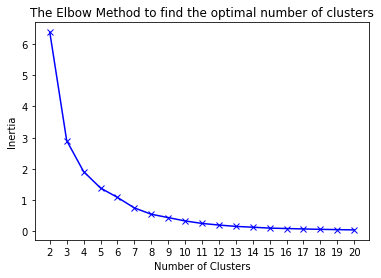

In [42]:
# Plot the Elbow Method to find the optimal number of clusters

KMeans_elbow(transformer = TfidfVectorizer(lowercase = False), array = X)

For n_clusters = 2 The average silhouette_score is : 0.06507760821142478
For n_clusters = 3 The average silhouette_score is : 0.09530921514422934
For n_clusters = 4 The average silhouette_score is : 0.14645336584038837
For n_clusters = 5 The average silhouette_score is : 0.16221438724931317
For n_clusters = 6 The average silhouette_score is : 0.223116249054885
For n_clusters = 7 The average silhouette_score is : 0.2546460237624166
For n_clusters = 8 The average silhouette_score is : 0.3320666045881725
For n_clusters = 9 The average silhouette_score is : 0.36306363128144825
For n_clusters = 10 The average silhouette_score is : 0.3945693599236379
For n_clusters = 11 The average silhouette_score is : 0.4642731468664674
For n_clusters = 12 The average silhouette_score is : 0.49430251241551654
For n_clusters = 13 The average silhouette_score is : 0.48587809694333145
For n_clusters = 14 The average silhouette_score is : 0.5164075250366184
For n_clusters = 15 The average silhouette_score is :

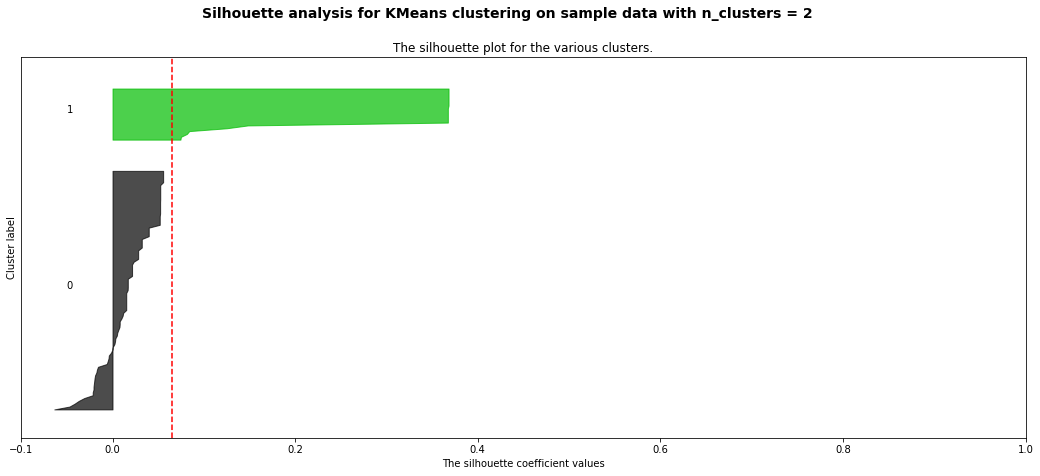

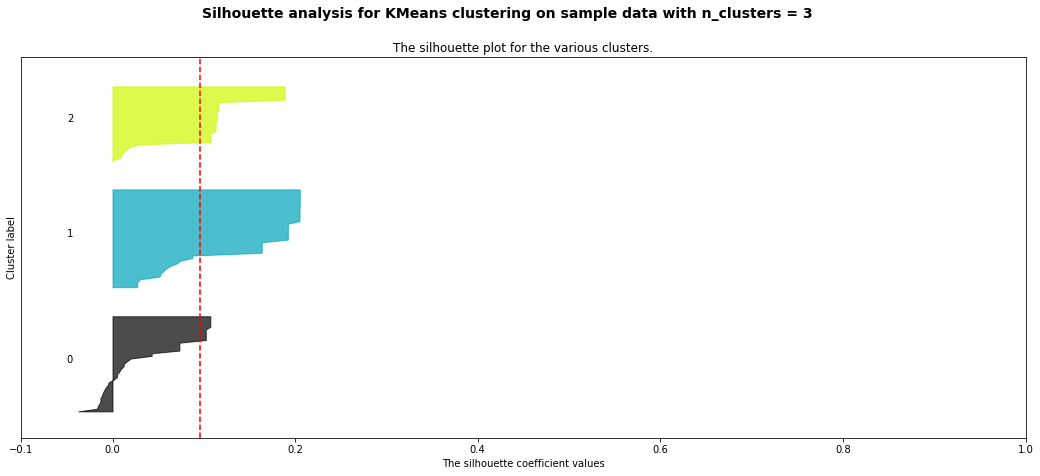

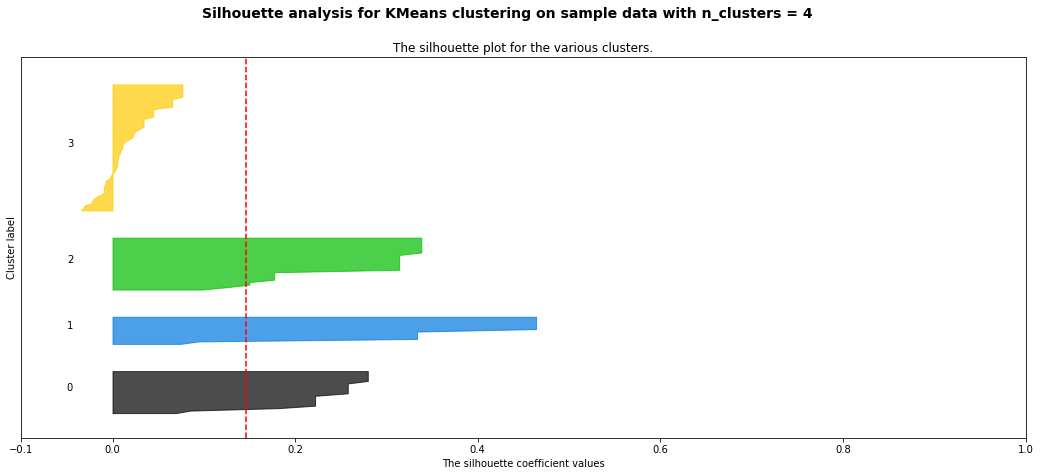

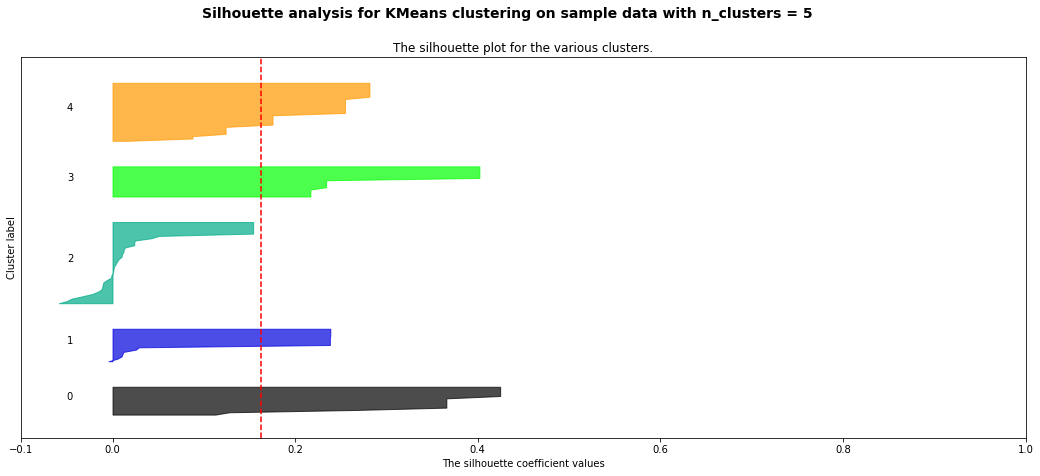

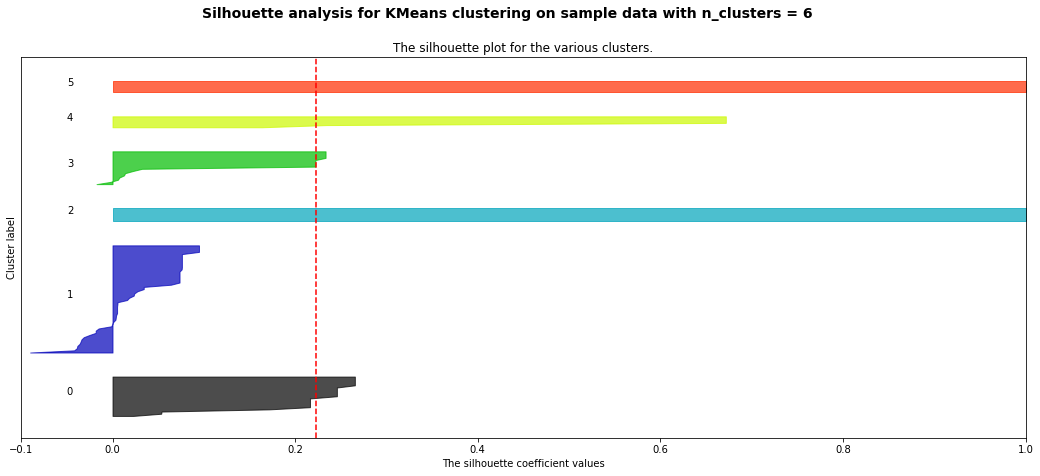

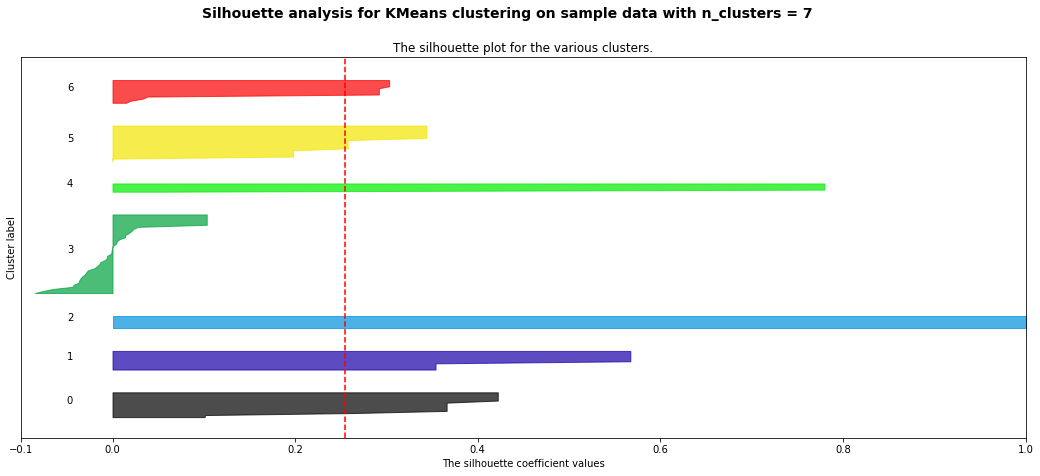

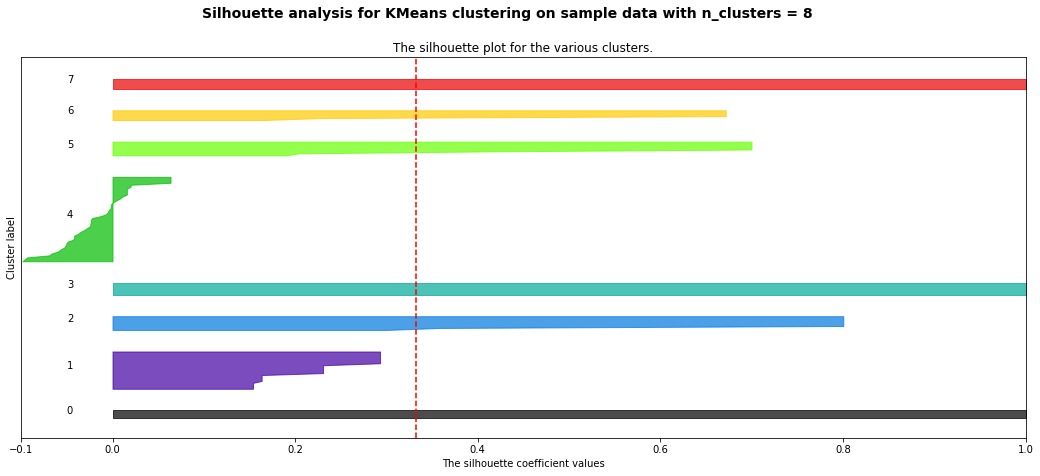

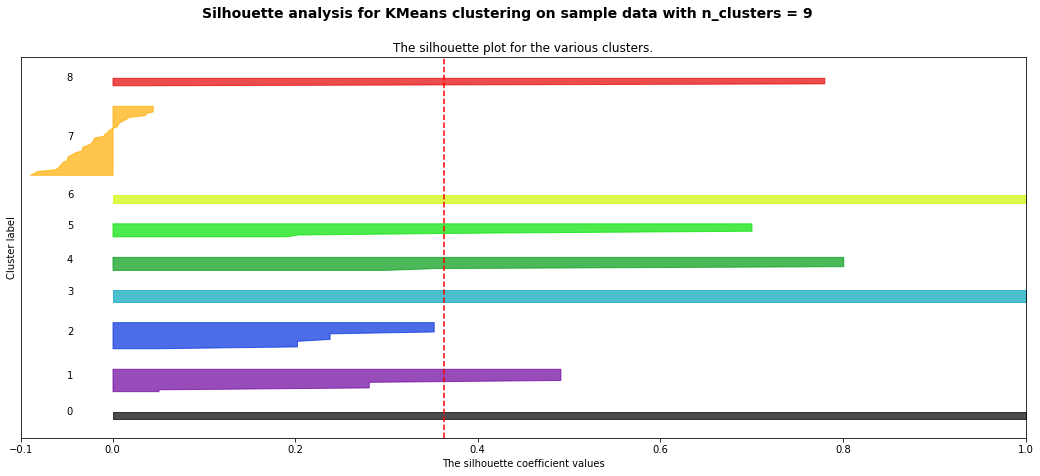

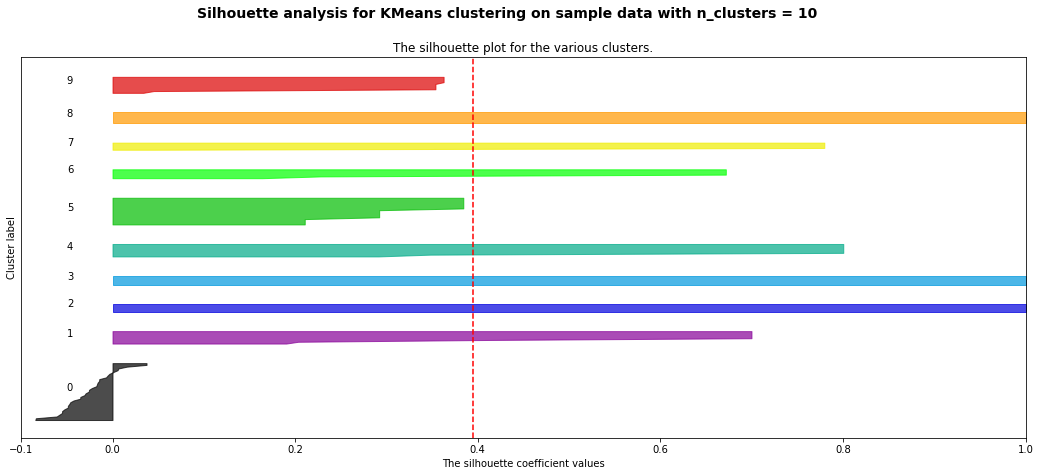

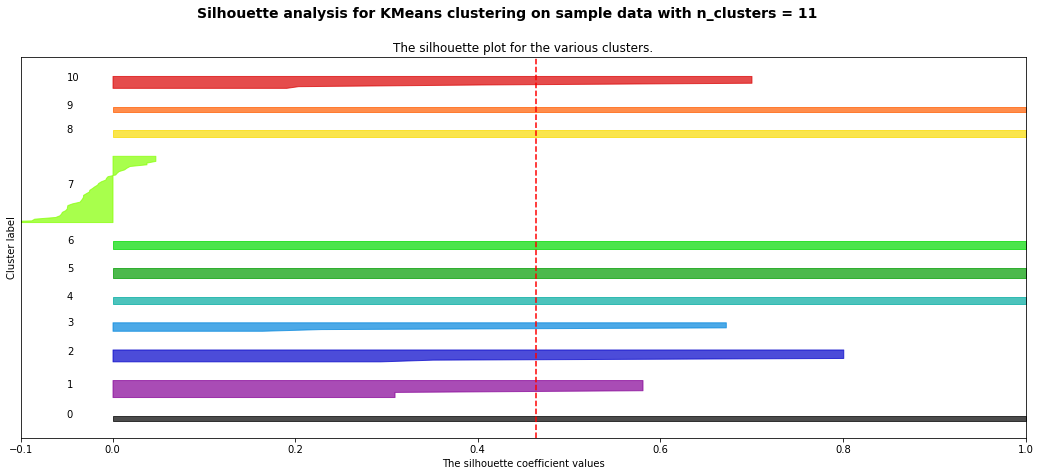

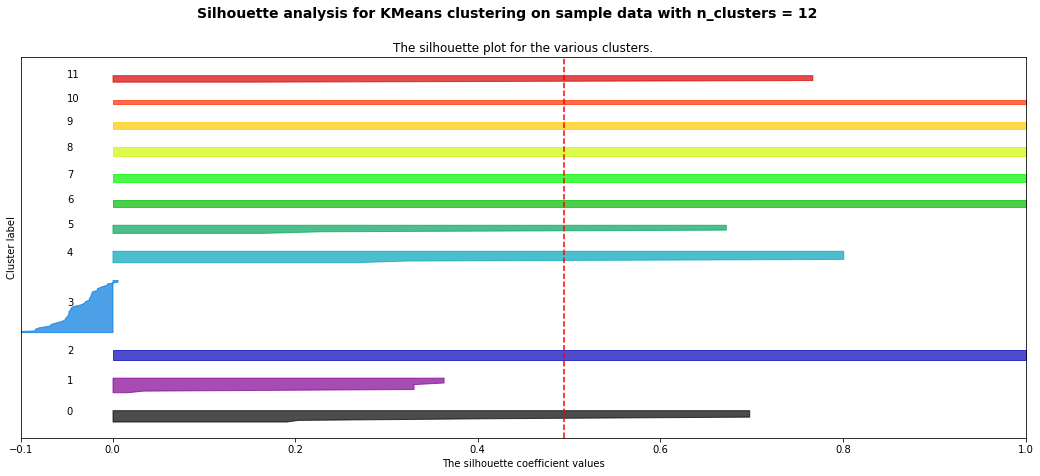

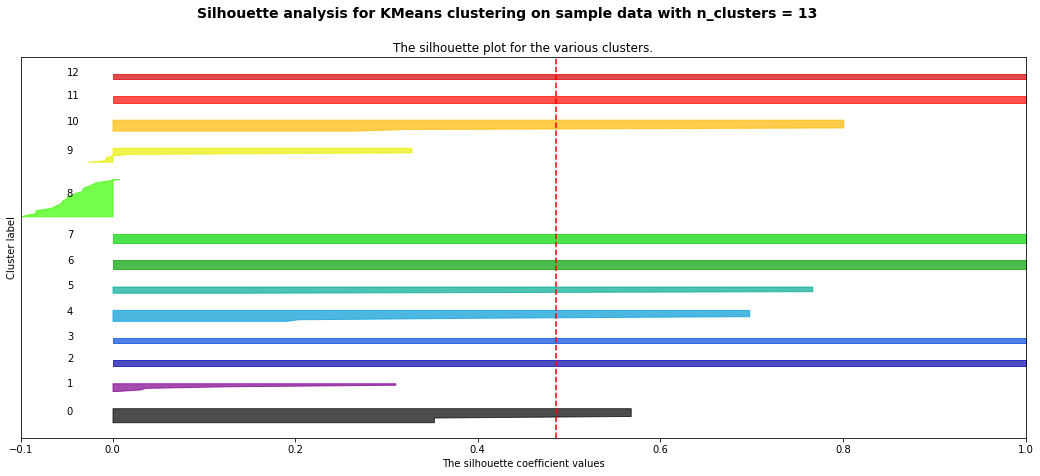

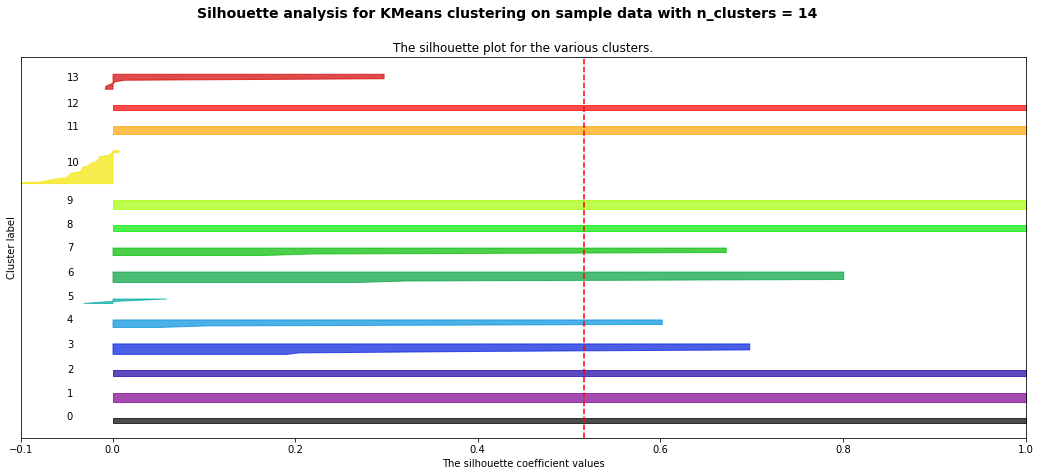

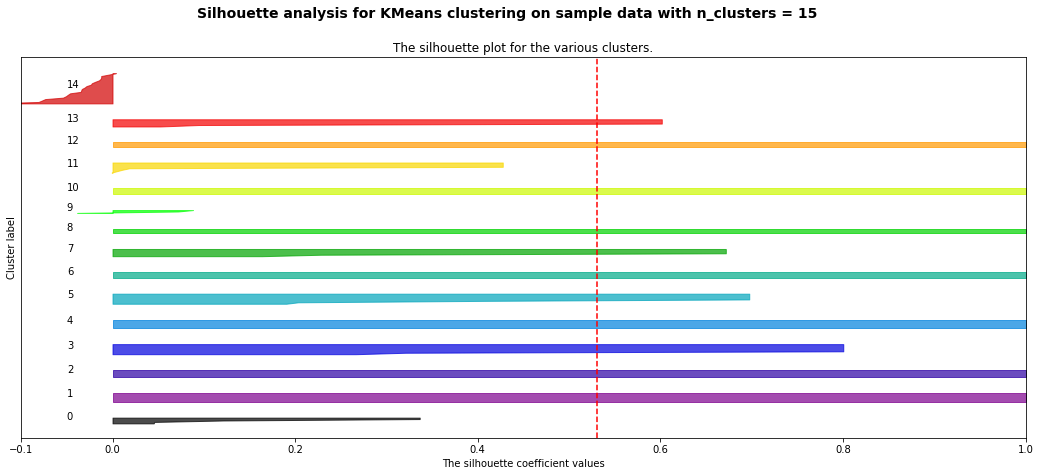

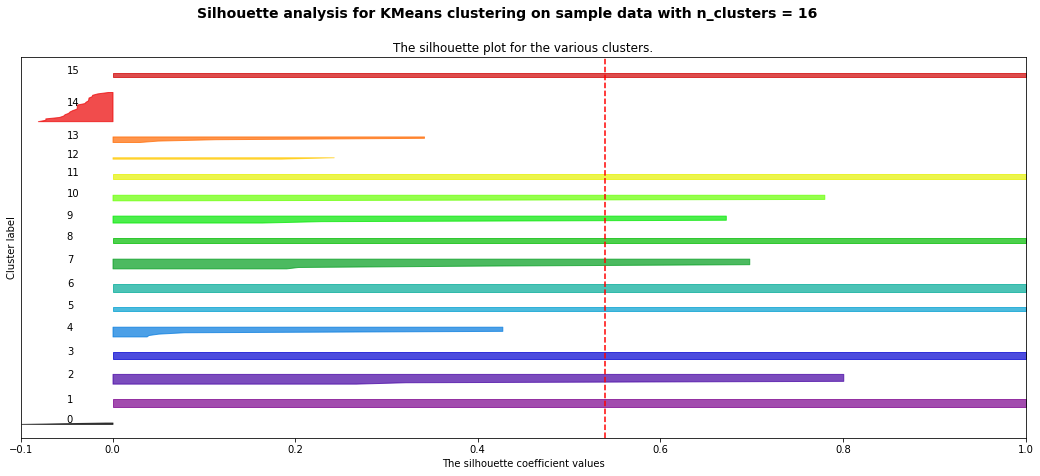

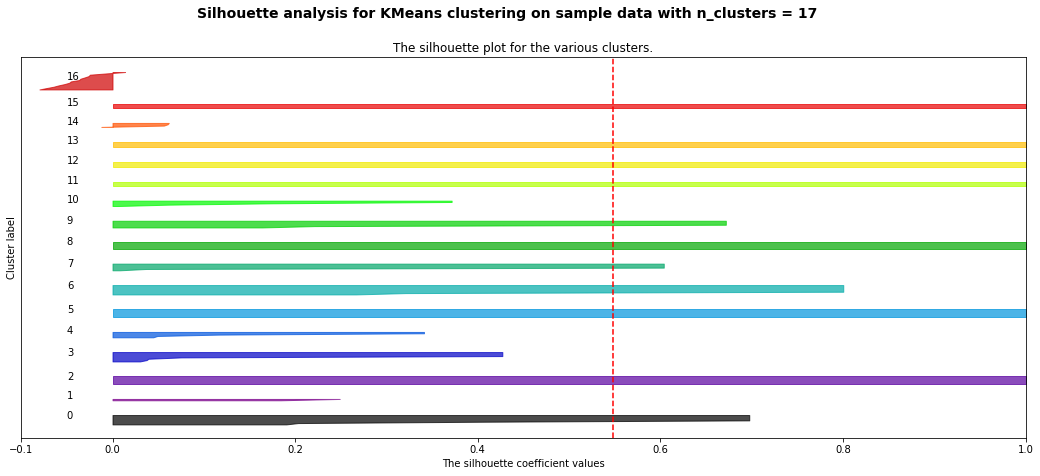

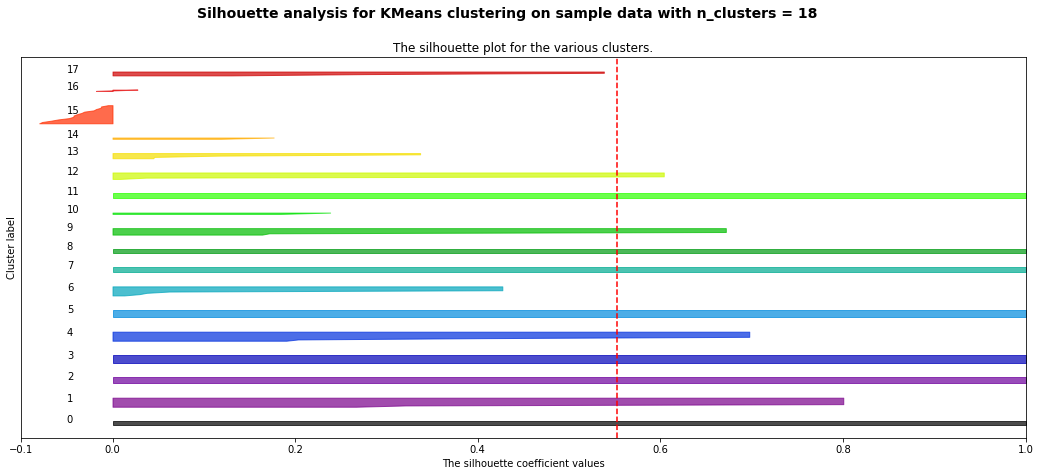

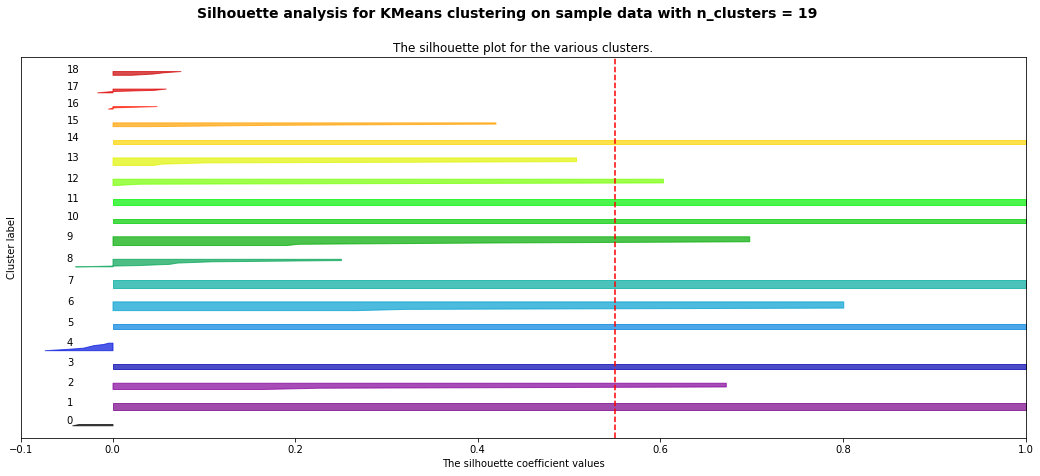

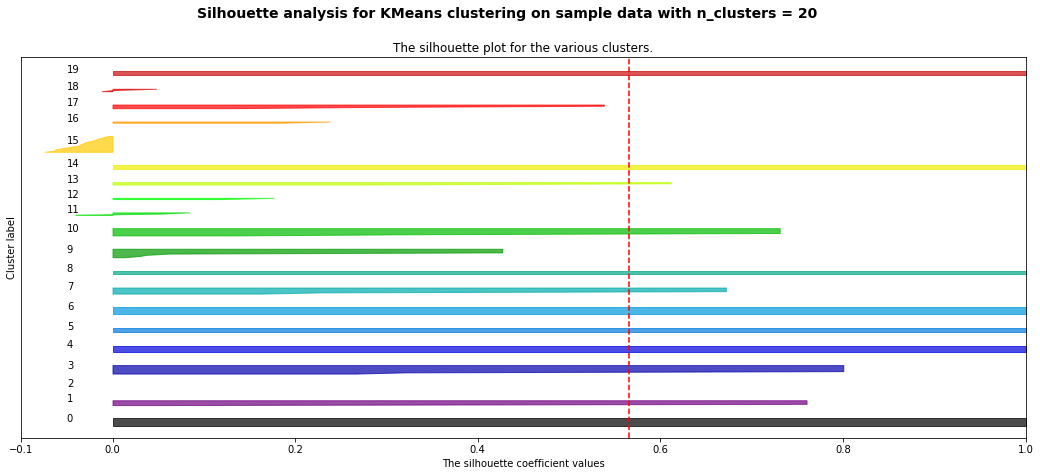

In [43]:
silhoutte_score_validation(model = KMeans, transformer = TfidfVectorizer(lowercase = False), array = X)

## seems like n = 3 is the best choice with TF-IDF and k-means 

In [52]:
# Creation of the pipeline with 5 as number of clusters

pipe_preprocessing = pipeline(est1 = CountVectorizer(lowercase = False))

pipe_predictor = pipeline2(est2 = KMeans(n_clusters = 3))

pipe_kmeans_cv = pipeline3(pipeline = pipe_preprocessing, pipeline2 = pipe_predictor)

# Fit the final pipeline

pipe_kmeans_cv.fit(X)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('est1', CountVectorizer(lowercase=False)),
                                 ('pca', TruncatedSVD())])),
                ('predictor',
                 Pipeline(steps=[('est2', KMeans(n_clusters=3))]))])

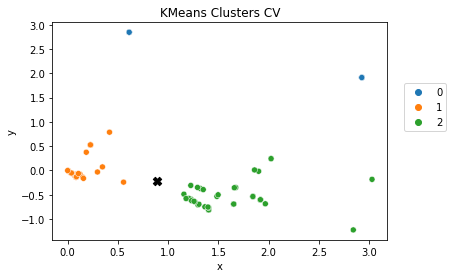

In [53]:
# Transform the data for the preprocessor

preprocessed_data = pipe_kmeans_cv['preprocessor'].transform(X)

# Labels Predictions

predicted_labels = pipe_kmeans_cv['predictor']['est2'].labels_

# Identify the centroids

clusters = pipe_kmeans_cv['predictor']['est2'].cluster_centers_

# Get the coordenates for the keyword ("Aspiring Human Resources")

keywords_preprocessed = pipe_kmeans_cv['preprocessor'].transform([string_keyword])


# Save the results in a data frame

results = results_df(preprocessing = preprocessed_data, predictions = predicted_labels)

# Plot the scatter plot with the centroids

plot_scatter(df = results, keyword = keywords_preprocessed, title = 'KMeans Clusters CV')

In [54]:
# Apply the function that calculates the Levenshtain distance

results_k_mean_levenshtein_cv = levenshtein_distance(df = results, string =  string_keyword)
# See the results

results_k_mean_levenshtein_cv.head(20)

,x,y,results,id,job_title,levenshtein_distance,levenshtein_distance_fit
0,1.652270,-0.693399,2,49,aspiring human resource specialist new york city,0.510204,0.600373
1,1.652270,-0.693399,2,60,aspiring human resource specialist new york city,0.510204,0.600373
2,1.652270,-0.693399,2,6,aspiring human resource specialist new york city,0.510204,0.600373
3,1.652270,-0.693399,2,36,aspiring human resource specialist new york city,0.510204,0.600373
4,1.652270,-0.693399,2,24,aspiring human resource specialist new york city,0.510204,0.600373
5,1.658450,-0.357581,2,97,aspiring human resource professional kokomo in...,0.538462,0.583645
6,1.257309,-0.636351,2,99,seeking human resource position la vega nevada,0.595745,0.551152
7,1.917907,-0.604018,2,52,student humber college aspiring human resource...,0.625000,0.535261
8,1.917907,-0.604018,2,50,student humber college aspiring human resource...,0.625000,0.535261
9,1.917907,-0.604018,2,7,student humber college aspiring human resource...,0.625000,0.535261


In [55]:
# Get the coordenates for the keyword ("Aspiring Human Resources")

keywords_preprocessed = pipe_kmeans_cv['preprocessor'].transform([string_keyword])

results_k_mean_gaussian_cv = euclidean_distance(df = results, keyword =  keywords_preprocessed)
# See the results

results_k_mean_gaussian_cv.head(20)

,x,y,results,id,job_title,levenshtein_distance,euclidean_distance,euclidean_fit
0,0.557038,-0.242081,1,77,human resourcesconflict managementpolicies pro...,0.853211,0.333499,0.716413
1,1.225606,-0.310108,2,81,senior human resource business partner heil en...,0.800000,0.345904,0.707580
2,1.157217,-0.489947,2,88,human resource management major milpitas calif...,0.803922,0.375653,0.686841
3,1.292106,-0.350910,2,74,human resource professional boston,0.794118,0.420993,0.656395
4,1.318191,-0.371657,2,67,human resource staffing recruiting professiona...,0.764706,0.452227,0.636209
5,1.178461,-0.579103,2,89,director human resource ey atlanta georgia,0.642857,0.456034,0.633792
6,1.206255,-0.577202,2,69,director human resource north america groupe b...,0.800000,0.472681,0.623329
7,1.349375,-0.395421,2,84,human resource professional world leader gi so...,0.833333,0.489567,0.612891
8,1.229031,-0.596436,2,30,seeking human resource opportunity chicago ill...,0.627451,0.502229,0.605180
9,1.229031,-0.596436,2,28,seeking human resource opportunity chicago ill...,0.627451,0.502229,0.605180


# K-means with word2vec

In [48]:
Xs = []
for i in range(len(X)):
    Xs.append((X[i].split(' ')))



In [49]:
w2v_model= Word2Vec(Xs, size=100, window=5, min_count=5, workers=2)
word2vec={w: vec for w, vec in zip(w2v_model.wv.index2word, w2v_model.wv.syn0)}

In [67]:

from gensim.models import Word2Vec, KeyedVectors
from gensim.test.utils import datapath

In [70]:
# Load word2vec model (trained on an enormous Google corpus)
model = gensim.models.KeyedVectors.load_word2vec_format('drive/MyDrive/Colab Notebooks/apziva/GoogleNews-vectors-negative300.bin.gz', binary = True) 

In [71]:
model.vector_size

300

In [76]:
#vector_list = [model[word] for word in Xs if word in model.vocab]
[model[word] for word in Xs[0] if word in model.vocab]

[array([-5.03906250e-01,  3.41796875e-01, -1.30859375e-01,  3.06640625e-01,
         7.51953125e-02,  3.88671875e-01,  1.69921875e-01, -2.03125000e-01,
        -1.47460938e-01, -1.47460938e-01, -5.95703125e-02,  6.68945312e-02,
        -2.81250000e-01,  1.99218750e-01,  2.65625000e-01,  2.31445312e-01,
         1.10351562e-01,  2.91015625e-01,  3.05175781e-02, -1.12792969e-01,
        -4.86328125e-01, -2.21679688e-01,  1.45507812e-01, -3.90625000e-02,
        -3.98437500e-01,  2.32421875e-01, -4.21875000e-01,  1.97265625e-01,
        -6.68945312e-02, -1.02539062e-01, -6.01196289e-03, -3.61328125e-02,
        -1.43554688e-01, -2.69531250e-01, -9.91210938e-02,  3.29589844e-02,
        -2.75390625e-01,  3.71093750e-01, -1.70898438e-02,  1.71875000e-01,
        -6.37817383e-03, -1.81640625e-01,  9.42382812e-02, -1.08886719e-01,
         2.68554688e-02, -1.25976562e-01, -2.05078125e-01, -2.49023438e-01,
        -2.37304688e-01, -1.26953125e-01,  7.03125000e-02,  3.43750000e-01,
         1.0

In [ ]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model[word] for word in Xs if word in model.vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in Xs if word in model.vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(3)

In [51]:
#from gensim.sklearn_api import W2VTransformer

transformer = w2vTransformer(Word2Vec)
#transformer = Word2Vec( Xs,min_count=1)
#Xs
transformer.fit_transform(Xs)

#for i

#transformer

AttributeError: ignored

In [ ]:
silhoutte_score_validation(model = KMeans, transformer = W2VTransformer(size=32, min_count=1), array = Xs)